In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats 

In [ ]:
# reading from csv files
test = pd.read_csv("/content/test.csv")
data = pd.read_csv("/content/train.csv")



# New Section

In [ ]:
test.head(5) #returns the first n rows for the object based on position

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
2,8,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53
3,10,0.23,Very Good,H,VS1,59.4,61.0,4.00,4.05,2.39
4,12,0.23,Ideal,J,VS1,62.8,56.0,3.93,3.90,2.46


In [ ]:
test.tail(5) # last n rows from the object based on position

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
10895,53922,0.7,Very Good,E,VS2,62.8,60.0,5.59,5.65,3.53
10896,53923,0.7,Very Good,D,VS1,63.1,59.0,5.67,5.58,3.55
10897,53933,0.7,Very Good,E,VS2,60.5,59.0,5.71,5.76,3.47
10898,53934,0.7,Very Good,E,VS2,61.2,59.0,5.69,5.72,3.49
10899,53938,0.7,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56


In [ ]:
test.shape

(10900, 10)

In [ ]:
test.info() #Return a tuple representing the dimensionality of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10900 entries, 0 to 10899
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10900 non-null  int64  
 1   carat       10900 non-null  float64
 2   cut         10900 non-null  object 
 3   color       10900 non-null  object 
 4   clarity     10900 non-null  object 
 5   depth       10900 non-null  float64
 6   table       10900 non-null  float64
 7   x           10900 non-null  float64
 8   y           10900 non-null  float64
 9   z           10900 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 851.7+ KB


In [ ]:
test.describe()

,Unnamed: 0,carat,depth,table,x,y,z
count,10900.000000,10900.000000,10900.000000,10900.000000,10900.000000,10900.000000,10900.000000
mean,27806.405688,0.801794,61.762532,57.526844,5.757932,5.759811,3.555975
std,15880.940837,0.443401,1.422198,2.210543,1.077961,1.069891,0.669389
min,1.000000,0.230000,52.200000,50.100000,0.000000,0.000000,0.000000
25%,14044.500000,0.410000,61.000000,56.000000,4.790000,4.800000,2.970000
50%,27911.500000,0.700000,61.900000,57.000000,5.680000,5.690000,3.520000
75%,40898.250000,1.130000,62.600000,59.000000,6.700000,6.690000,4.130000
max,53938.000000,2.500000,71.600000,73.000000,8.800000,8.890000,5.580000


In [ ]:
test.describe(include=object)

,cut,color,clarity
count,10900,10900,10900
unique,5,7,8
top,Ideal,G,SI1
freq,4127,2212,2702


In [ ]:
#Viewing the levels of a categorical variable
categorical_features = ['cut', 'color', 'clarity']
for value in categorical_features:
    print(value,': ', (test[value].unique()))

cut :  ['Ideal' 'Good' 'Very Good' 'Fair' 'Premium']
color :  ['E' 'H' 'J' 'G' 'D' 'F' 'I']
clarity :  ['SI2' 'VS1' 'SI1' 'VS2' 'VVS2' 'VVS1' 'IF' 'I1']


In [ ]:
print('Features: ', test.columns.tolist())

Features:  ['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa3ca3fb90>,
      dtype=object)

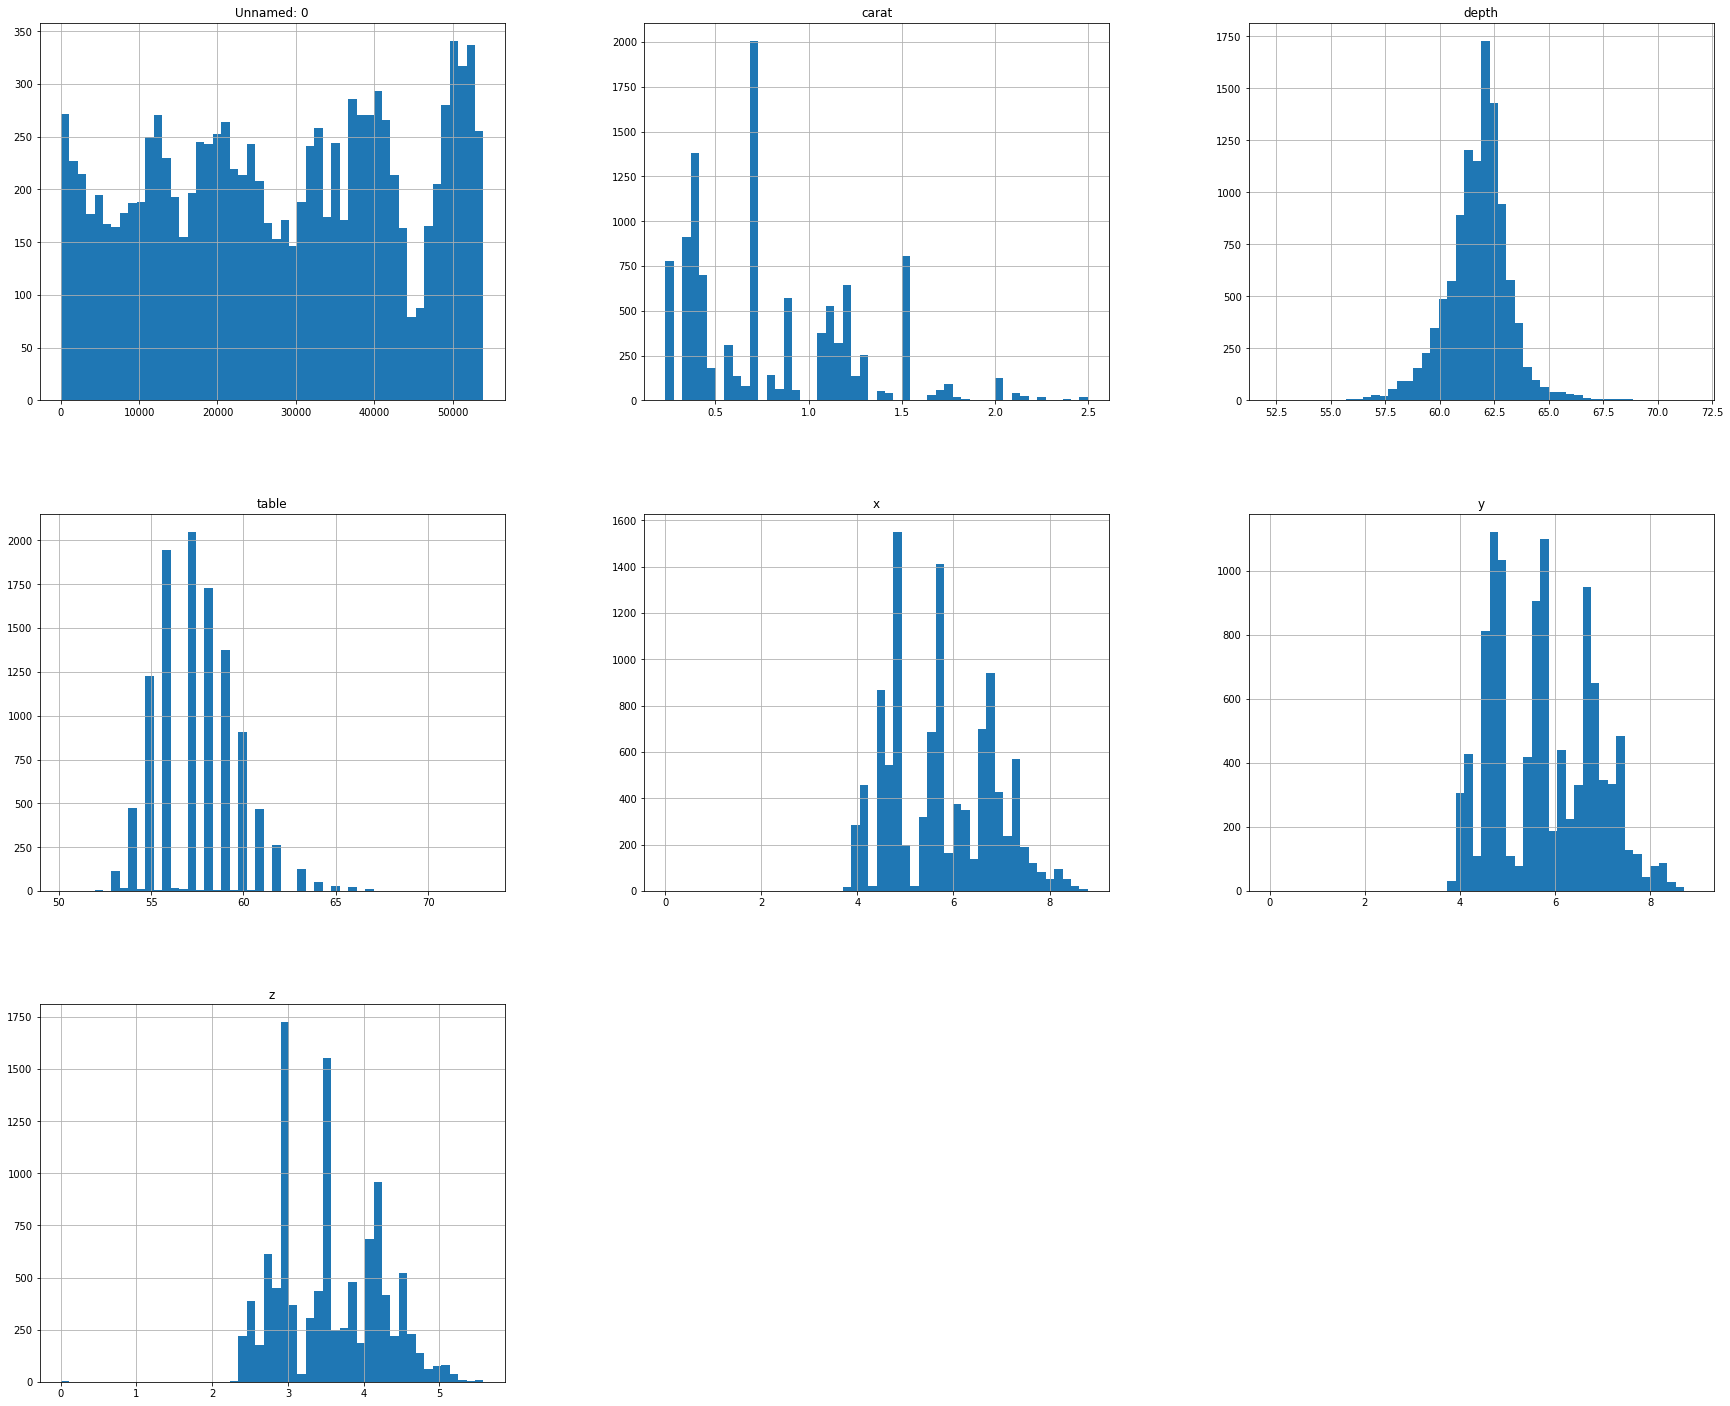

In [ ]:
# visualize continuous features
test.drop(['cut', 'color', 'clarity'], axis=1).hist(bins=50, figsize=(30, 25))

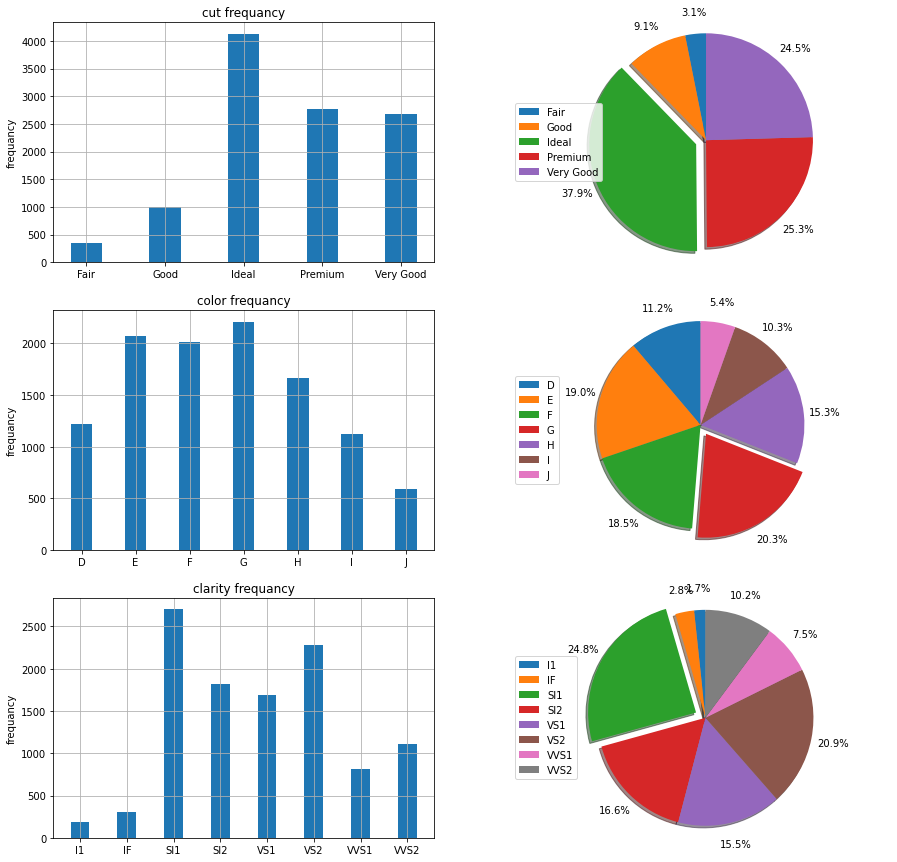

In [ ]:
fig, ax = plt.subplots(3,2, figsize=(15,15))
explode = (0, 0.1, 0, 0)
for count, value in enumerate(categorical_features):
    freq_table = pd.crosstab(index=test[value], columns='frequancy')
    # visualize bar_plot
    ax[count, 0].bar(freq_table.index.tolist(), freq_table['frequancy'],  width=0.4)
    ax[count, 0].grid()
    ax[count, 0].set_title(str(value)+' frequancy')
    ax[count, 0].set_ylabel('frequancy')
    # visualize pie_plot
    sizes = np.array(freq_table['frequancy'].values.tolist())
    sizes = (sizes/len(test))*100
    max_val = max(sizes)
    max_index = np.where(sizes == max_val)
    explode = tuple([0 if i!=max_index[0][0] else 0.1 for i in range(len(sizes))])
    ax[count, 1].pie(sizes, explode=explode, labels=None, pctdistance=1.2, autopct='%1.1f%%', shadow=True, startangle=90)
    ax[count, 1].legend(labels=freq_table['frequancy'].index, loc=6)
    ax[count, 1].axis('equal')

In [ ]:
print(test.isna().sum())
print('=====================================')
print((test == 0.0).sum())

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
dtype: int64
Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             1
y             1
z             3
dtype: int64


In [ ]:
data[(data.x == 0)| (data.y == 0) | (data.z == 0)][['x', 'y', 'z']]

,x,y,z
1702,6.55,6.48,0.0
1787,6.66,6.60,0.0
4373,6.50,6.47,0.0
8300,7.15,7.04,0.0
9130,0.00,6.62,0.0
9722,0.00,0.00,0.0
12918,0.00,0.00,0.0
19546,8.49,8.45,0.0
19640,0.00,0.00,0.0
20925,8.52,8.42,0.0


In [ ]:
print('Total ZEROS: ', len(data[(data.x == 0)| (data.y == 0) | (data.z == 0)]))
trash_data = data[(data.x == 0)| (data.y == 0) | (data.z == 0)][['x', 'y', 'z']].index.tolist()
print('Trash data: ', trash_data)
data.drop(trash_data, inplace=True)
print((data == 0.0).sum()[['x', 'y', 'z']])

Total ZEROS:  17
Trash data:  [1702, 1787, 4373, 8300, 9130, 9722, 12918, 19546, 19640, 20925, 21780, 22050, 22117, 22315, 39924, 39925, 41306]
x    0
y    0
z    0
dtype: int64


In [ ]:
data.shape

(43023, 11)

In [ ]:
numerical_features = ['carat', 'depth', 'table', 'price','x', 'y', 'z']

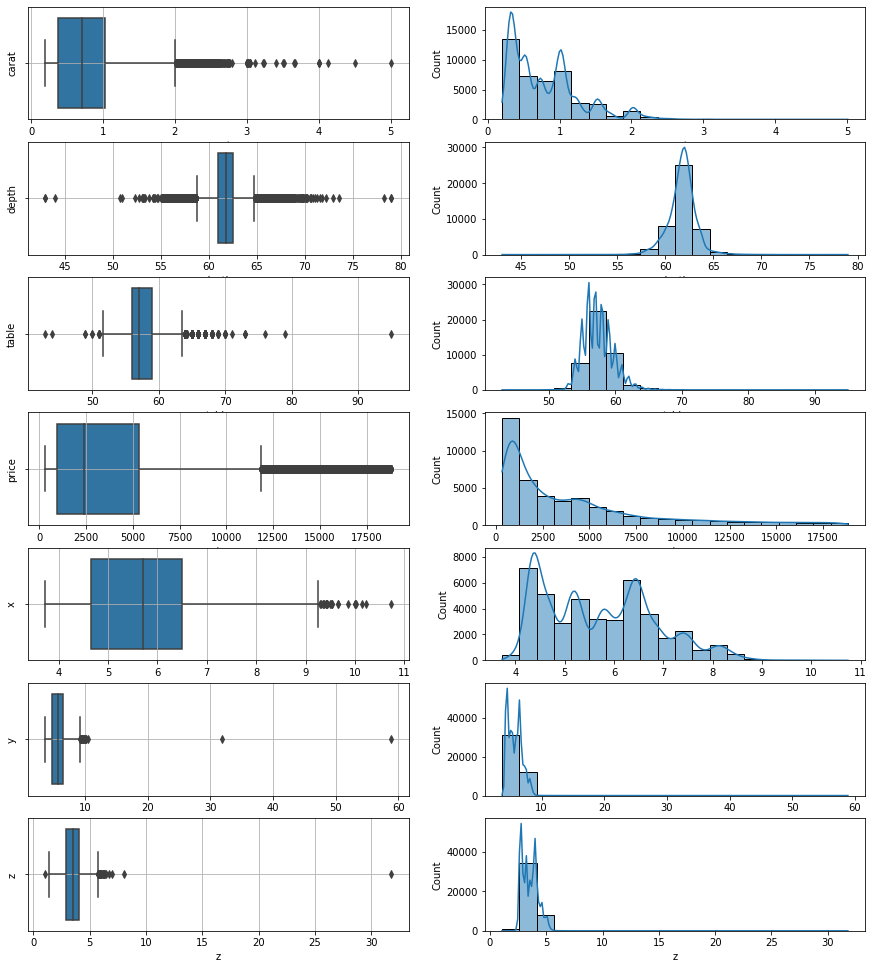

In [ ]:
fig, ax = plt.subplots(7,2, figsize=(15,17))
for count1, value in enumerate(numerical_features):
    # visulaize box plot
    sns.boxplot(data=data, x=data[value], ax=ax[count1, 0])
    ax[count1, 0].set_ylabel(str(value))
    ax[count1, 0].grid()
    # visulaize histogram plot
    bins = len(data[value].unique())//2
    sns.histplot(data=data, x=data[value], bins=20, kde=True, ax=ax[count1, 1])

In [ ]:
def detect_outLier_features(df):
    for feature in numerical_features:
        q1 = np.quantile(df[feature], 0.25, interpolation='midpoint')
        q3 = np.quantile(df[feature], 0.75, interpolation='midpoint')
        IQR = q3 - q1
        upper_outlier = q3 + (1.5 * IQR)
        lower_outlier = q1 - (1.5 * IQR)
        print(str(feature)+' IQR :', IQR)
        print(str(feature)+' Upper Outlier :', upper_outlier)
        print(str(feature)+' Lower Outlier :', lower_outlier)
        print('==============================================')
detect_outLier_features(data)

carat IQR : 0.65
carat Upper Outlier : 2.005
carat Lower Outlier : -0.5950000000000001
depth IQR : 1.5
depth Upper Outlier : 64.75
depth Lower Outlier : 58.75
table IQR : 3.0
table Upper Outlier : 63.5
table Lower Outlier : 51.5
price IQR : 4366.5
price Upper Outlier : 11855.75
price Lower Outlier : -5610.25
x IQR : 1.8399999999999999
x Upper Outlier : 9.26
x Lower Outlier : 1.9000000000000004
y IQR : 1.83
y Upper Outlier : 9.245000000000001
y Lower Outlier : 1.9249999999999998
z IQR : 1.1499999999999995
z Upper Outlier : 5.744999999999999
z Lower Outlier : 1.145000000000001


In [ ]:
def detect_outLier_df(df):
  q1 = df.quantile(0.25)
  q3 = df.quantile(0.75)
  IQR = q3 - q1
  new_df = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
  return new_df

In [ ]:
sub_data = data[numerical_features]
print(sub_data.shape)
sub_data.head(5)

(43023, 7)


,carat,depth,table,price,x,y,z
0,0.21,59.8,61.0,326,3.89,3.84,2.31
1,0.29,62.4,58.0,334,4.20,4.23,2.63
2,0.31,63.3,58.0,335,4.34,4.35,2.75
3,0.24,62.8,57.0,336,3.94,3.96,2.48
4,0.24,62.3,57.0,336,3.95,3.98,2.47


In [ ]:
new_df = detect_outLier_df(sub_data)
print(sum(new_df.isnull().sum().tolist()))

7106


In [ ]:
attrib = list(sub_data)
def remove_outLier_from_data(df):
  for i in attrib:
    df_outlier_removed = detect_outLier_df(df[i])
    df_outlier_removed = pd.DataFrame(df_outlier_removed)
    ind_diff=df.index.difference(df_outlier_removed.index)
    print(i, ': ', len(ind_diff))
    for j in range(0, len(ind_diff), 1):
      final_df = df.drop([ind_diff[j]])
      df = final_df
  return df

In [ ]:
# Data without the outliers
data = remove_outLier_from_data(data)

carat :  1654
depth :  2186
table :  265
price :  1899
x :  0
y :  1
z :  2


In [ ]:
print(data.shape)
data.isnull().sum()

(37016, 11)


Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [ ]:
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


Ideal        16235
Premium       9330
Very Good     8319
Good          2919
Fair           213
Name: cut, dtype: int64
         cut   price
2      Ideal  1655.0
4  Very Good  2368.0
3    Premium  2412.5
1       Good  2777.0
0       Fair  3443.0


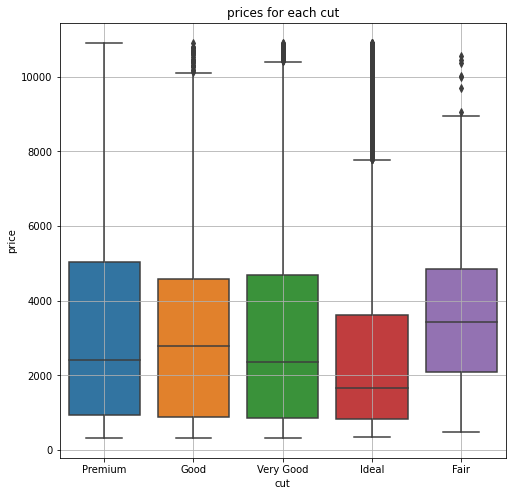

In [ ]:
print(data['cut'].value_counts())
print('=============================')
print(data[['cut', 'price']].groupby(['cut'], as_index=False).median().sort_values(by='price'))
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=data, x=data.cut, y=data.price, ax=ax)
ax.set_title('prices for each cut')
ax.grid()

SI1     8875
VS2     8745
VS1     5766
SI2     5710
VVS2    3587
VVS1    2635
IF      1343
I1       355
Name: clarity, dtype: int64
  clarity   price
1      IF  1013.0
6    VVS1  1041.0
7    VVS2  1216.0
5     VS2  1746.0
4     VS1  1799.0
2     SI1  2528.0
0      I1  3199.0
3     SI2  3801.0


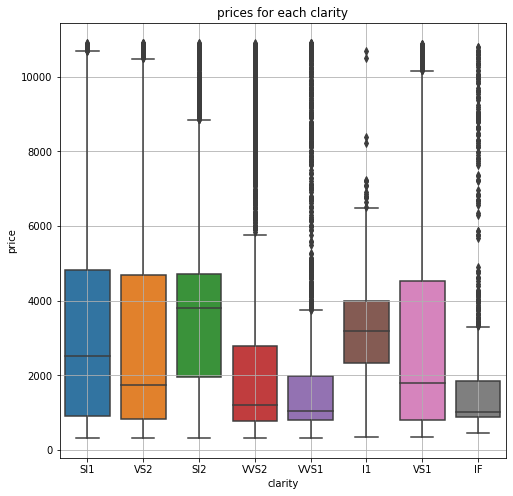

In [ ]:
print(data['clarity'].value_counts())
print('=============================')
print(data[['clarity', 'price']].groupby(['clarity'], as_index=False).median().sort_values(by='price'))
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=data, x=data.clarity, y=data.price, ax=ax)
ax.set_title('prices for each clarity')
ax.grid()

G    7960
E    6889
F    6544
H    5533
D    5006
I    3383
J    1701
Name: color, dtype: int64
  color   price
1     E  1656.0
0     D  1717.0
3     G  1847.0
2     F  2064.0
4     H  2519.0
5     I  2596.0
6     J  3528.0


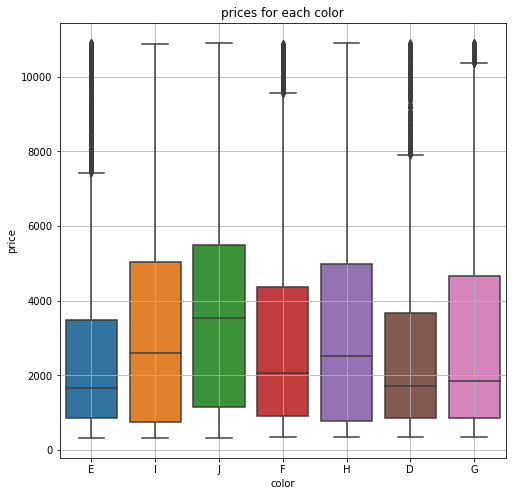

In [ ]:
print(data['color'].value_counts())
print('=============================')
print(data[['color', 'price']].groupby(['color'], as_index=False).median().sort_values(by='price'))
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=data, x=data.color, y=data.price, ax=ax)
ax.set_title('prices for each color')
ax.grid()

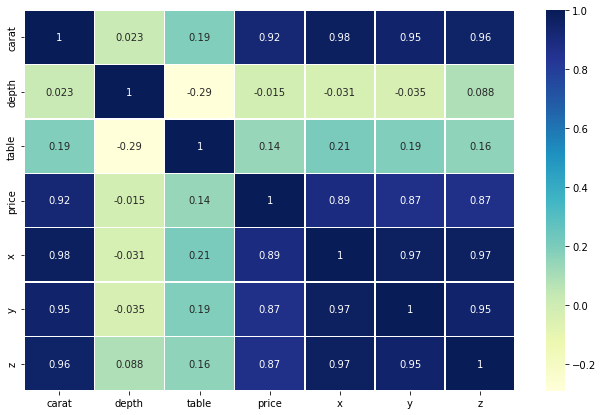

In [ ]:
data_corr = sub_data.corr()
f, ax = plt.subplots(figsize=(11,7))
sns.heatmap(data_corr, annot=True, linewidths=0.5, ax=ax, cmap="YlGnBu")

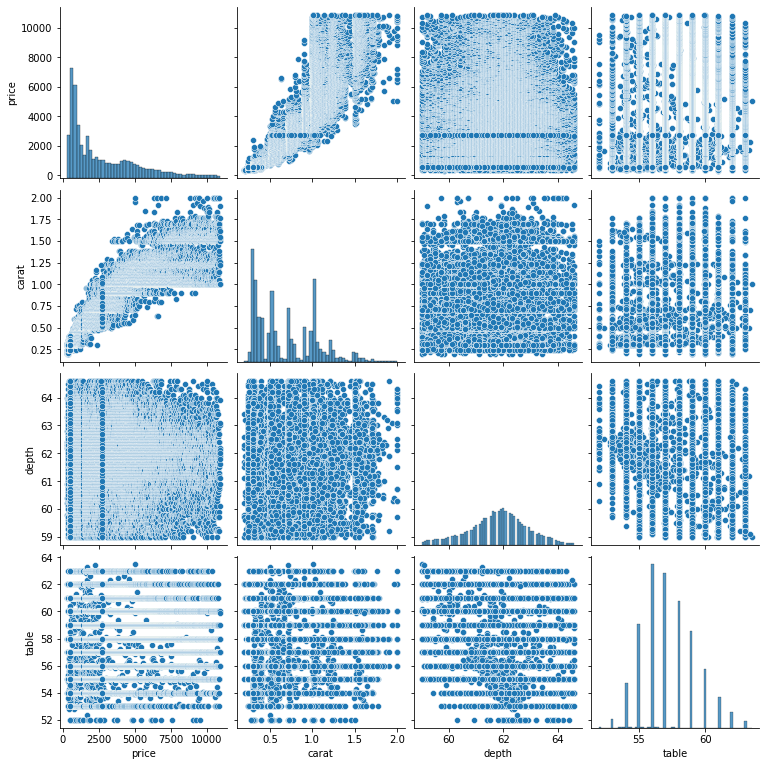

In [ ]:
sns.pairplot(data=data, vars = ['price', 'carat', 'depth', 'table'], height=2.7)

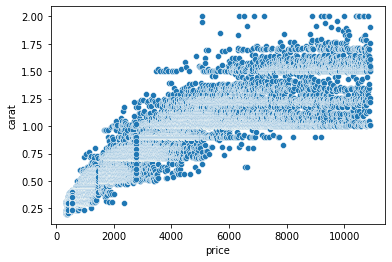

In [ ]:
sns.scatterplot(data=data, x=data.price, y=data.carat)

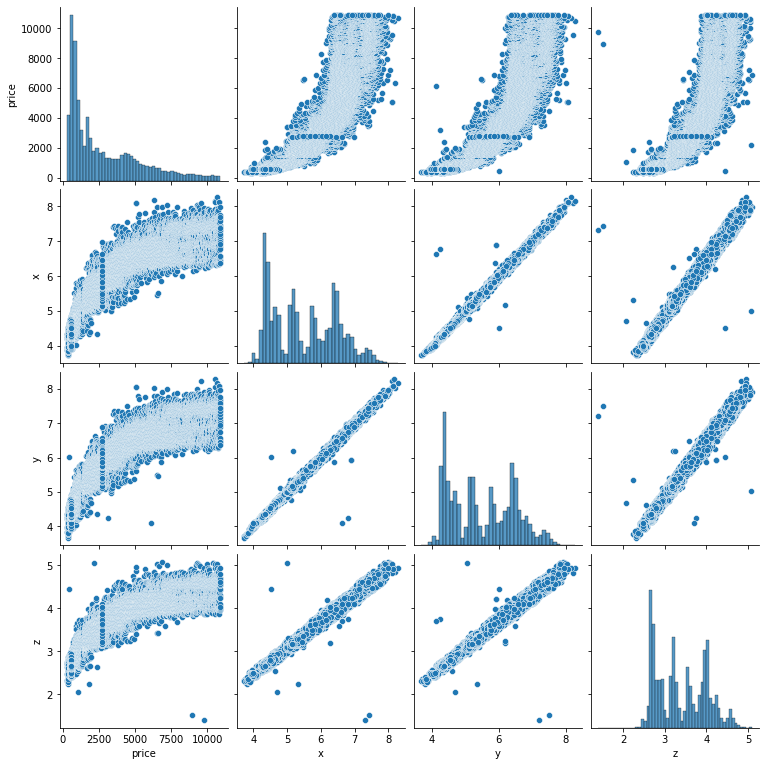

In [ ]:
sns.pairplot(data=data, vars = ['price', 'x', 'y', 'z'], height=2.7)

In [ ]:
data['volume'] = data['x'] * data['y'] * data['z']
data_corr = data.corr()
data_corr['price'].sort_values(ascending=False)

price         1.000000
volume        0.925239
carat         0.924180
y             0.905887
x             0.904967
z             0.901741
table         0.147553
depth         0.012010
Unnamed: 0   -0.468525
Name: price, dtype: float64

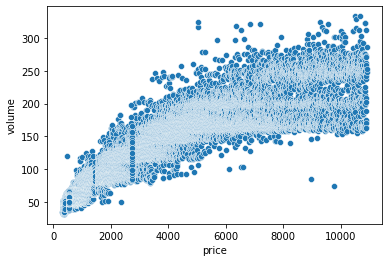

In [ ]:
sns.scatterplot(data=data, x=data.price, y=data.volume)

In [ ]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(data,random_state=42, test_size=0.2)

In [ ]:

target = train_set['price'].copy()
data = train_set.drop('price', axis=1)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
diamond_cat = data[['cut', 'color', 'clarity']]
ordinal_encoder = OrdinalEncoder(categories = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], 
                                               ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                                              ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])
diamond_cat_encoded = ordinal_encoder.fit_transform(diamond_cat)
diamond_cat_encoded[:10]

array([[4., 6., 3.],
       [2., 3., 3.],
       [3., 6., 2.],
       [3., 2., 2.],
       [4., 1., 5.],
       [3., 2., 2.],
       [4., 1., 2.],
       [3., 3., 5.],
       [4., 3., 3.],
       [3., 3., 3.]])

In [ ]:
cat_df = pd.DataFrame(diamond_cat_encoded, columns=['cut', 'color', 'clarity'])
cat_df

,cut,color,clarity
0,4.0,6.0,3.0
1,2.0,3.0,3.0
2,3.0,6.0,2.0
3,3.0,2.0,2.0
4,4.0,1.0,5.0
...,...,...,...
29607,4.0,0.0,4.0
29608,4.0,1.0,1.0
29609,4.0,2.0,3.0
29610,3.0,1.0,2.0


In [ ]:
price_df = pd.DataFrame(target, columns=['price'])
price_df = price_df.reset_index()
price_df.drop('index', axis=1, inplace=True)
price_df


,price
0,945
1,766
2,5543
3,5123
4,2485
...,...
29607,424
29608,4428
29609,6165
29610,2947


In [ ]:
cat_price_df = cat_df.merge(price_df, how = 'left', left_index = True, right_index=True)
cat_price_df.isna().sum()

cut        0
color      0
clarity    0
price      0
dtype: int64

In [ ]:
data_corr = cat_price_df.corr()
data_corr['price']

cut       -0.084307
color     -0.132457
clarity   -0.164282
price      1.000000
Name: price, dtype: float64

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
class Volume(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        volume = X['x'] * X['y'] * X['z']
        return np.c_[X, volume]

In [ ]:
vul_com = Volume()
vul_values = vul_com.transform(data)
vul_values.shape

(29612, 12)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
data = train_set.drop('price', axis=1)
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,volume
29528,36576,0.35,Ideal,D,VS2,62.3,56.0,4.54,4.51,2.82,57.740628
25472,31562,0.38,Very Good,G,VS2,59.2,60.0,4.70,4.73,2.79,62.024490
10901,13507,1.01,Premium,D,SI1,61.7,62.0,6.34,6.30,3.90,155.773800
9680,11916,1.07,Premium,H,SI1,60.4,59.0,6.65,6.62,4.01,176.532230
41788,52241,0.73,Ideal,I,VVS2,63.3,57.0,5.77,5.73,3.64,120.346044


In [ ]:
numerical_data = data.drop(['cut', 'color', 'clarity'], axis=1)
categorical_data = data[['cut', 'color', 'clarity']].copy()

In [ ]:
num_dimension = list(numerical_data)
num_dimension

['Unnamed: 0', 'carat', 'depth', 'table', 'x', 'y', 'z', 'volume']

In [ ]:
num_attribs = list(numerical_data)
cat_attribs = list(categorical_data)
numerical_pip = Pipeline([('volume', Volume()),('Standard', StandardScaler())])
full_pipeline = ColumnTransformer([('numerical', numerical_pip, num_attribs), ('categrical', OrdinalEncoder(categories = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], 
                                               ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                                              ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]), cat_attribs)])
final_data = full_pipeline.fit_transform(data)

In [ ]:
final_data

array([[ 0.58747458, -0.94869185,  0.46380411, ...,  4.        ,
         6.        ,  3.        ],
       [ 0.27466926, -0.86493558, -2.41767823, ...,  2.        ,
         3.        ,  3.        ],
       [-0.85171685,  0.89394612, -0.09390215, ...,  3.        ,
         6.        ,  2.        ],
       ...,
       [-0.73617727,  1.00562115,  0.74265724, ...,  4.        ,
         2.        ,  3.        ],
       [-1.61551332,  0.58683979, -0.8375105 , ...,  3.        ,
         1.        ,  2.        ],
       [-0.35599467,  2.23404647,  0.83560828, ...,  2.        ,
         2.        ,  3.        ]])

# **Fit several models** 

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(final_data, target)
lin_pre = lin_reg.predict(final_data)
print('linear regression predictions: ', lin_pre)

linear regression predictions:  [1034.07620204  399.5477391  5206.90638882 ... 5287.35273835 3522.32769282
 8802.48801418]


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
lin_mse = mean_squared_error(target, lin_pre)
lin_rmse = np.sqrt(lin_mse)
print('RMSE for linear predictions: ', lin_rmse)

RMSE for linear predictions:  742.5326625829761


In [ ]:
from sklearn.model_selection import cross_val_score
lin_sco_mse = cross_val_score(lin_reg, final_data, target, scoring='neg_mean_squared_error', cv=10)
lin_sco_rmse = np.sqrt(-lin_sco_mse)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(lin_sco_rmse)

Scores: [742.41115066 722.14967404 717.01367407 724.36752675 730.38707705
 779.2688629  763.64890649 741.76758332 760.81672009 747.40142541]
Mean: 742.9232600794796
Standard deviation: 19.226811052551398


In [ ]:
from sklearn.tree import DecisionTreeRegressor 

In [ ]:
d_tree = DecisionTreeRegressor()
d_tree.fit(final_data, target)
d_predict = d_tree.predict(final_data)
print('Decision Tree predictions: ', d_predict)

Decision Tree predictions:  [ 945.  766. 5543. ... 6165. 2947. 9552.]


In [ ]:
des_mse = mean_squared_error(target, d_predict)
des_rmse = np.sqrt(des_mse)
print('RMSE for Decision Tree predictions: ', des_rmse)

RMSE for Decision Tree predictions:  0.0


In [ ]:
d_cross_mse = cross_val_score(d_tree, final_data, target, scoring='neg_mean_squared_error', cv=10)
d_cross_rmse = np.sqrt(-d_cross_mse)
display_scores(d_cross_rmse)

Scores: [26.21832837 62.62230168 57.33566299 19.30267807 28.2130111  23.95364487
 31.65735479 35.69309402 39.01012607 22.88403728]
Mean: 34.689023922955975
Standard deviation: 13.881810048693707


In [ ]:
from sklearn.ensemble import RandomForestRegressor
ranF = RandomForestRegressor()
ranF.fit(final_data, target)
ranF_predict = ranF.predict(final_data)
print('Random Forest predictions: ', ranF_predict)

Random Forest predictions:  [ 944.93  765.99 5542.88 ... 6164.84 2947.42 9552.41]


In [ ]:
ran_mse = mean_squared_error(target, ranF_predict)
ran_rmse = np.sqrt(ran_mse)
print('RMSE for Random Forest predictions: ', ran_rmse)

RMSE for Random Forest predictions:  9.749029636317177


In [ ]:
ranF_cross_mse = cross_val_score(ranF, final_data, target, scoring='neg_mean_squared_error', cv=10)
ranF_cross_rmse = np.sqrt(-ranF_cross_mse)
display_scores(ranF_cross_rmse)

Scores: [24.32485168 25.65053916 35.6959404  12.14384196 14.6968851  26.05758234
 16.17109647 38.03961665 30.44295436 22.38467002]
Mean: 24.560797812372282
Standard deviation: 8.187511718010661


In [ ]:
ranF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import GridSearchCV
forest_reg = RandomForestRegressor()
param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},]
ranf_grid_search = GridSearchCV(forest_reg, param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
ranf_grid_search.fit(final_data, target)
print('Best_Estimator: ', ranf_grid_search.best_estimator_)
print('*********************************************')
scores = ranf_grid_search.cv_results_
for mean_score, params in zip(scores['mean_test_score'], scores['params']):
    print(np.sqrt(-mean_score), params)

Best_Estimator:  RandomForestRegressor(max_features=8, n_estimators=10)
*********************************************
262.227021714714 {'max_features': 2, 'n_estimators': 3}
200.22999217053265 {'max_features': 2, 'n_estimators': 10}
169.27582532874243 {'max_features': 2, 'n_estimators': 30}
135.8683187184721 {'max_features': 4, 'n_estimators': 3}
99.34072997051445 {'max_features': 4, 'n_estimators': 10}
81.30576506054693 {'max_features': 4, 'n_estimators': 30}
82.73913230040391 {'max_features': 6, 'n_estimators': 3}
61.66302893170758 {'max_features': 6, 'n_estimators': 10}
48.19389048936254 {'max_features': 6, 'n_estimators': 30}
59.57111599149015 {'max_features': 8, 'n_estimators': 3}
38.77286034127506 {'max_features': 8, 'n_estimators': 10}
39.460657530126 {'max_features': 8, 'n_estimators': 30}
241.96402808801727 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
173.31674052370087 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
162.99409661176207 {'bootstrap': F

In [ ]:
final_model = ranf_grid_search.best_estimator_

In [ ]:
test_set.head(50000)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,volume
17429,21734,1.64,Ideal,E,SI1,60.7,55.0,9801,7.67,7.64,4.65,272.484420
42081,52665,0.77,Good,G,SI2,63.9,59.0,2550,5.84,5.78,3.71,125.231792
10407,12876,1.03,Premium,H,VS2,62.6,56.0,5364,6.43,6.38,4.01,164.503834
24918,30798,0.30,Ideal,D,VS1,60.8,58.0,742,4.31,4.34,2.63,49.195202
18097,22566,1.52,Very Good,H,VS2,63.3,57.0,10618,7.33,7.32,4.64,248.961984
...,...,...,...,...,...,...,...,...,...,...,...,...
27791,34432,0.30,Ideal,G,IF,62.5,54.0,863,4.31,4.33,2.70,50.388210
16093,19988,1.60,Premium,F,SI2,60.5,60.0,8530,7.55,7.52,4.56,258.898560
8777,10744,1.00,Very Good,F,SI1,61.4,62.0,4851,6.32,6.36,3.89,156.359328
35615,44471,0.54,Ideal,E,SI1,61.5,56.0,1594,5.31,5.26,3.25,90.774450


In [ ]:
test_data = test_set.drop('price', axis=1)
y_hat = test_set['price'].copy()

In [ ]:
final_test_data = full_pipeline.transform(test_data)

In [ ]:
final_prediction = final_model.predict(final_test_data)

In [ ]:
final_mse = mean_squared_error(y_hat, final_prediction)

In [ ]:
final_rmse = np.sqrt(final_mse)
print(final_rmse)

42.21924054285116


NameError: ignored